#### References:
    www.python.org
    www.numpy.org
    www.matplotlib.org
    https://pandas.pydata.org

#### Questions/feedback: petert@digipen.edu

# Data Cleaning

* **Missing Data**
    - Add
    - Fill
    - Drop
* **Data Transformations**
    - Remove duplicates
    - Replace values
    - Discretize and bin
    - Detect outliers

## Missing Data
Rectangular data has rows (observations) and columns (features). Ideally all observations has all values from all features.
### What is missing data? It can be
- specific value(s)
- feature(s)
- observation(s)
- feature names/labels
- index names
- etc.

### What can cause to have missing data?
- physical loss
- data collection defect
- network outage
- data comes too fast, cannot record all at once

### Representation of missing numerical data:
- NaN (Not a Number)
- type(NaN) is float
- NaN can be specified

#### Example:

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.DataFrame([[0, 2, np.nan, 4], 
                   [2, 1, 3, np.nan], 
                   [4, 2, np.nan, 1], 
                   [4, 2, 3, 1]])
df.columns = ['A', 'B', 'C', 'D']
df.index = ['first', 'second', 'third', 'fourth']
df

,A,B,C,D
first,0,2,NaN,4.0
second,2,1,3.0,NaN
third,4,2,NaN,1.0
fourth,4,2,3.0,1.0


### Statistics and missing numerical data:
- .describe() method disregards missing data and calculates basic statistics
- .info() method lists the RangeIndex and the number of non nulls per feature
- .isna() and .isnull() methods can be used to query NaNs

#### Examples

In [3]:
print(df)

        A  B    C    D
first   0  2  NaN  4.0
second  2  1  3.0  NaN
third   4  2  NaN  1.0
fourth  4  2  3.0  1.0


In [4]:
df.describe()

,A,B,C,D
count,4.000000,4.00,2.0,3.000000
mean,2.500000,1.75,3.0,2.000000
std,1.914854,0.50,0.0,1.732051
min,0.000000,1.00,3.0,1.000000
25%,1.500000,1.75,3.0,1.000000
50%,3.000000,2.00,3.0,1.000000
75%,4.000000,2.00,3.0,2.500000
max,4.000000,2.00,3.0,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, first to fourth
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      int64  
 1   B       4 non-null      int64  
 2   C       2 non-null      float64
 3   D       3 non-null      float64
dtypes: float64(2), int64(2)
memory usage: 160.0+ bytes


In [6]:
df

,A,B,C,D
first,0,2,NaN,4.0
second,2,1,3.0,NaN
third,4,2,NaN,1.0
fourth,4,2,3.0,1.0


In [7]:
df.isna()

,A,B,C,D
first,False,False,True,False
second,False,False,False,True
third,False,False,True,False
fourth,False,False,False,False


In [8]:
df.isnull()

,A,B,C,D
first,False,False,True,False
second,False,False,False,True
third,False,False,True,False
fourth,False,False,False,False


Note that .isnull() and .isna() are the very same in Pandas:
* pandas.DataFrame.isna()
* pandas.DataFrame.isnull()

There is .isnan in Numpy which is different:

In [9]:
print(42,    "\tdenotes missing data:", np.isnan(42))
print("NaN", "\tdenotes missing data:", np.isnan(np.nan))

42 	denotes missing data: False
NaN 	denotes missing data: True


"Adding" missing data (*NaN*s) in dataframes:

In [10]:
# first create an empty dataframe:
df = pd.DataFrame(np.empty(24).reshape(4,6))
df

,0,1,2,3,4,5
0,7.819568e-312,7.460391e-322,0.000000e+00,0.000000e+00,7.565876e-307,1.160955e-28
1,1.947938e-57,3.603812e-143,7.201249e+252,9.305404e+199,1.762465e-27,4.550720e+198
2,3.027766e-110,6.967708e+252,3.626964e-143,8.057344e+175,4.536835e+217,2.028607e+174
3,1.049173e-153,5.040809e+223,4.042479e-109,6.482246e+170,3.671459e+228,2.600982e-306


In [11]:
df[:] = np.nan
df

,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# another way to first create an all zeros dataframe
df = pd.DataFrame(np.zeros(shape=(3,4)))
# set all values to NaN the same way but specifying iloc 
df.iloc[:] = np.nan
df

,0,1,2,3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN


... and another way:

In [13]:
pd.DataFrame(np.nan, index = range(3), columns = range(5))

,0,1,2,3,4
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN


... and one more:

In [14]:
df = pd.DataFrame(np.zeros([2, 3])*np.nan)
df

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN


Filling in missing data (*NaN*s) in dataframes:

In [15]:
df = pd.DataFrame([[0, 2, np.nan, 4], 
                   [2, 1, 3, np.nan], 
                   [4, 2, np.nan, 1], 
                   [4, 2, 3, 1]])
df.columns = ['A', 'B', 'C', 'D']
df.index = ['first', 'second', 'third', 'fourth']
df

,A,B,C,D
first,0,2,NaN,4.0
second,2,1,3.0,NaN
third,4,2,NaN,1.0
fourth,4,2,3.0,1.0


**.fillna()** used with specific value to fill in all *NaN*s: 

In [16]:
df.fillna(value='filled', inplace=True)
df

,A,B,C,D
first,0,2,filled,4
second,2,1,3,filled
third,4,2,filled,1
fourth,4,2,3,1


Note that it only applies when *inplace=True* is set. By default it is *inplace=False*

Use **.ffil()** or **.bfill()** to forward or backward fill *NaN*s:

In [19]:
df = pd.DataFrame([[0, 2, np.nan, 4], 
                   [2, 1, 3, np.nan], 
                   [4, 2, np.nan, 1], 
                   [4, 2, 3, 1]])
df.columns = ['A', 'B', 'C', 'D']
df.index = ['first', 'second', 'third', 'fourth']
print("A dataframe with some NaNs:\n", df)

df_bf = df.bfill()
print("\nA dataframe with NaNs backward filled:\n", df_bf)

df_ff = df.ffill()
print("\nA dataframe with NaNs forward filled:\n", df_ff)

df.ffill(inplace=True)
df.bfill(inplace=True)
print("\nA dataframe with NaNs forward and backward filled,\nin this case everything gets filled in:\n", df)

A dataframe with some NaNs:
         A  B    C    D
first   0  2  NaN  4.0
second  2  1  3.0  NaN
third   4  2  NaN  1.0
fourth  4  2  3.0  1.0

A dataframe with NaNs backward filled:
         A  B    C    D
first   0  2  3.0  4.0
second  2  1  3.0  1.0
third   4  2  3.0  1.0
fourth  4  2  3.0  1.0

A dataframe with NaNs forward filled:
         A  B    C    D
first   0  2  NaN  4.0
second  2  1  3.0  4.0
third   4  2  3.0  1.0
fourth  4  2  3.0  1.0

A dataframe with NaNs forward and backward filled,
in this case everything gets filled in:
         A  B    C    D
first   0  2  3.0  4.0
second  2  1  3.0  4.0
third   4  2  3.0  1.0
fourth  4  2  3.0  1.0


Note that not everything was forward filled as there was no preceding value for an NaN 

#### Example to fill in NaNs in specific rows and columns:

In [20]:
df = pd.DataFrame([[0, 2, np.nan, 4], 
                   [2, 1, 3, np.nan], 
                   [4, 2, np.nan, 1], 
                   [4, 2, 3, 1]])
df.columns = ['A', 'B', 'C', 'D']
df.index = ['first', 'second', 'third', 'fourth']
print("A dataframe with some NaNs:\n\n", df)

#df.fillna({2: 'filled in third column', 3: 'filled in fourth column'})
df.fillna({'C': 'filled in third column', 'D': 'filled in fourth column'})

A dataframe with some NaNs:

         A  B    C    D
first   0  2  NaN  4.0
second  2  1  3.0  NaN
third   4  2  NaN  1.0
fourth  4  2  3.0  1.0


,A,B,C,D
first,0,2,filled in third column,4
second,2,1,3,filled in fourth column
third,4,2,filled in third column,1
fourth,4,2,3,1


Though when checking on the dataframe, the changes were not implemented:

In [ ]:
df

inplace = True needs to be used.

Lets look at how to limit changes to a specific slice/range only:

In [ ]:
print("A dataframe with some NaNs:\n", df)

df.loc['first':'second','C'].fillna(value=32, inplace=True)
print("\nA dataframe with filled NaNs \nin the first 2 rows and third column:\n", df)

df.loc['first':'second','D'].fillna(value=42, inplace=True)
print("\nA dataframe with filled NaNs \nin the first 2 rows and fourth column:\n", df)

We can fill *NaN*s with calculated values too:

In [ ]:
# a dataframe with one NaN
df

In [ ]:
# fill in the NaN using the average of a slice (last three rows of the first column):
df.fillna(value=round(df.iloc[1:,0].mean(),2), inplace=True)
df

#### Example to drop rows and columns with *NaN*s:

In [21]:
df = pd.DataFrame([[0, np.nan, 2, np.nan, 4], 
                   [2, np.nan, 1, 3, np.nan], 
                   [4, 5, 2, np.nan, 1], 
                   [4, 5, 2, 3, 1]])
df.columns = ['A', 'B', 'C', 'D', 'E']
df.index = ['first', 'second', 'third', 'fourth']
print("A dataframe with some NaNs:\n\n", df)

df.dropna(inplace=True)
df

A dataframe with some NaNs:

         A    B  C    D    E
first   0  NaN  2  NaN  4.0
second  2  NaN  1  3.0  NaN
third   4  5.0  2  NaN  1.0
fourth  4  5.0  2  3.0  1.0


,A,B,C,D,E
fourth,4,5.0,2,3.0,1.0


Notice that all rows were dropped where *NaN* was present

Now lets see how to drop columns where *NaN* is present:

In [22]:
df = pd.DataFrame([[0, np.nan, 2, np.nan, 4], 
                   [2, np.nan, 1, 3, np.nan], 
                   [4, 5, 2, np.nan, 1], 
                   [4, 5, 2, 3, 1]])
df.columns = ['A', 'B', 'C', 'D', 'E']
df.index = ['first', 'second', 'third', 'fourth']
print("A dataframe with some NaNs:\n\n", df)

# specify axis 1 for columns
df.dropna(inplace=True, axis=1)  # default is axis=0, applies to rows
df

A dataframe with some NaNs:

         A    B  C    D    E
first   0  NaN  2  NaN  4.0
second  2  NaN  1  3.0  NaN
third   4  5.0  2  NaN  1.0
fourth  4  5.0  2  3.0  1.0


,A,C
first,0,2
second,2,1
third,4,2
fourth,4,2


Now drop rows or columns where all values are *NaN*s:

In [23]:
df = pd.DataFrame([[0, np.nan, 2, np.nan, 4], 
                   [2, np.nan, 1, 3, np.nan], 
                   [4, np.nan, 2, np.nan, 1], 
                   [4, np.nan, 2, 3, 1]])
df.columns = ['A', 'B', 'C', 'D', 'E']
df.index = ['first', 'second', 'third', 'fourth']
print("A dataframe with some NaNs:\n\n", df)
# specify axis 1 for columns
df.dropna(inplace=True, axis=1, how='all')
df

A dataframe with some NaNs:

         A   B  C    D    E
first   0 NaN  2  NaN  4.0
second  2 NaN  1  3.0  NaN
third   4 NaN  2  NaN  1.0
fourth  4 NaN  2  3.0  1.0


,A,C,D,E
first,0,2,NaN,4.0
second,2,1,3.0,NaN
third,4,2,NaN,1.0
fourth,4,2,3.0,1.0


Dropping too many rows may not be an option. Assume we want to keep rows where there are "enough" values present (other than *NaN*s).

Use a treshold to limit the number of rows to be dropped.

For exmple use thresh=4 to keep rows where at least 4 non-NaN values are present:

In [24]:
df = pd.DataFrame([[0, np.nan, 2, np.nan, 4], 
                   [2, np.nan, 1, 3, np.nan], 
                   [4, np.nan, 2, np.nan, 1], 
                   [4, 5, 2, 3, 1],
                   [0, 3, 2, np.nan, 4]])
df.columns = ['A', 'B', 'C', 'D', 'E']
df.index = ['first', 'second', 'third', 'fourth', 'fifth']
print("A dataframe with some NaNs:\n\n", df)

df.dropna(thresh=4, inplace=True)
df

A dataframe with some NaNs:

         A    B  C    D    E
first   0  NaN  2  NaN  4.0
second  2  NaN  1  3.0  NaN
third   4  NaN  2  NaN  1.0
fourth  4  5.0  2  3.0  1.0
fifth   0  3.0  2  NaN  4.0


,A,B,C,D,E
fourth,4,5.0,2,3.0,1.0
fifth,0,3.0,2,NaN,4.0


## Data Transformations

### Duplicate rows
Duplicate rows may be needed in case very same observations could happen

Example:
 * we are looking for anonymous data (e.g. non-indexed) related to age, height and weight only:
         a large enough population most likely yield with duplicate rows even though related to different individuals

<br>
In other cases duplicate rows could be a result of manual or programmatical mistakes and/or not expected at all

Example:
 * we are looking at indexed data:
         one (indexed) observation is expected from each individual of a population

#### Examples
Filter/find duplicate rows:

In [25]:
df = pd.DataFrame([[0, 1, 2, 3, 4], 
                   [0, 1, 2, 3, 4], 
                   [0, 1, 2, 3, 4], 
                   [4, 5, 2, 3, 1],
                   [0, 1, 2, 3, 4],
                   [4, 2, 2, 3, 1],
                   [4, 5, 2, 3, 1]])
df.columns = ['A', 'B', 'C', 'D', 'E']
df.index = ['first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh']
print("A dataframe with some duplicated rows:\n\n", df)

df.duplicated()

A dataframe with some duplicated rows:

          A  B  C  D  E
first    0  1  2  3  4
second   0  1  2  3  4
third    0  1  2  3  4
fourth   4  5  2  3  1
fifth    0  1  2  3  4
sixth    4  2  2  3  1
seventh  4  5  2  3  1


first      False
second      True
third       True
fourth     False
fifth       True
sixth      False
seventh     True
dtype: bool

Notice that a row is marked as duplicated once there is a previous row which was the same.

E.g.: in this case the very first row is not marked as duplicated since its the first instance of a set of same rows.

Dropping duplicates:

In [26]:
df.drop_duplicates()

,A,B,C,D,E
first,0,1,2,3,4
fourth,4,5,2,3,1
sixth,4,2,2,3,1


Notice that the first instances are kept. We can change that and keep the last ones, see the row indeces are now different:

In [27]:
df.drop_duplicates(keep='last')

,A,B,C,D,E
fifth,0,1,2,3,4
sixth,4,2,2,3,1
seventh,4,5,2,3,1


In case we don't trust any of the duplicate rows, we can drop them all:

In [28]:
df.drop_duplicates(keep=False)

,A,B,C,D,E
sixth,4,2,2,3,1


### Replacing values
We can replace specific values or a range of values with specific values or a range of values.

#### Examples:

In [29]:
df = pd.DataFrame([[0, 999, 2, -999, 4], 
                   [2, 999, 1, 3, -999], 
                   [4, 1000, 2, 999, 1], 
                   [4, 5, 2, 3, 1],
                   [0, 3, 2, 999, 4]])
df.columns = ['A', 'B', 'C', 'D', 'E']
df.index = ['first', 'second', 'third', 'fourth', 'fifth']
print("A dataframe with some NaNs:\n\n", df)

df.replace(-999, np.nan, inplace=True)
df

A dataframe with some NaNs:

         A     B  C    D    E
first   0   999  2 -999    4
second  2   999  1    3 -999
third   4  1000  2  999    1
fourth  4     5  2    3    1
fifth   0     3  2  999    4


,A,B,C,D,E
first,0,999,2,NaN,4.0
second,2,999,1,3.0,NaN
third,4,1000,2,999.0,1.0
fourth,4,5,2,3.0,1.0
fifth,0,3,2,999.0,4.0


Now replace a set of values (999 and -999) with NaNs.

Note that -999 and 999 are often set instead of empty or NaN as a practice in older datasets (where such "large" numbers would not be expected).

In [30]:
df = pd.DataFrame([[0, 999, 2, -999, 4], 
                   [2, 999, 1, 3, -999], 
                   [4, 1000, 2, 999, 1], 
                   [4, 5, 2, 3, 1],
                   [0, 3, 2, 999, 4]])
df.columns = ['A', 'B', 'C', 'D', 'E']
df.index = ['first', 'second', 'third', 'fourth', 'fifth']
print("A dataframe with some NaNs:\n\n", df)

df.replace([-999, 999], np.nan, inplace=True)
df

A dataframe with some NaNs:

         A     B  C    D    E
first   0   999  2 -999    4
second  2   999  1    3 -999
third   4  1000  2  999    1
fourth  4     5  2    3    1
fifth   0     3  2  999    4


,A,B,C,D,E
first,0,NaN,2,NaN,4.0
second,2,NaN,1,3.0,NaN
third,4,1000.0,2,NaN,1.0
fourth,4,5.0,2,3.0,1.0
fifth,0,3.0,2,NaN,4.0


Also can replace using lists.
In this specific case:

        -999 and +999   map to  NaN
        -1000 and 1000  map to  'min' and 'max'

In [31]:
df = pd.DataFrame([[0, 999, 2, -999, 4], 
                   [2, 999, 1, 3, -999], 
                   [4, 1000, 2, 999, 1], 
                   [4, 5, 2, 3, 1],
                   [0, 3, 2, 999, 4]])
df.columns = ['A', 'B', 'C', 'D', 'E']
df.index = ['first', 'second', 'third', 'fourth', 'fifth']
print("A dataframe with some NaNs:\n\n", df)

df.replace([-999, 999, 1000], [np.nan, np.nan, 'MAX'], inplace=True)
print("\nThe dataframe with replacements:")
df

A dataframe with some NaNs:

         A     B  C    D    E
first   0   999  2 -999    4
second  2   999  1    3 -999
third   4  1000  2  999    1
fourth  4     5  2    3    1
fifth   0     3  2  999    4

The dataframe with replacements:


,A,B,C,D,E
first,0,NaN,2,NaN,4
second,2,NaN,1,3,NaN
third,4,MAX,2,NaN,1
fourth,4,5,2,3,1
fifth,0,3,2,NaN,4


Replacement with calculated values:

In [32]:
df = pd.DataFrame([[0, np.nan, 2, np.nan, 4], 
                   [2, np.nan, 1, 3, np.nan], 
                   [4, np.nan, 2, np.nan, 1], 
                   [4, 5, 2, 3, 1],
                   [0, 3, 2, np.nan, 4]])
df.columns = ['A', 'B', 'C', 'D', 'E']
df.index = ['first', 'second', 'third', 'fourth', 'fifth']
print("A dataframe with some NaNs:\n\n", df)

# replace everything with the mean value of all values in the dataframe
df.replace(np.nan, df.mean(), inplace=True)
df

A dataframe with some NaNs:

         A    B  C    D    E
first   0  NaN  2  NaN  4.0
second  2  NaN  1  3.0  NaN
third   4  NaN  2  NaN  1.0
fourth  4  5.0  2  3.0  1.0
fifth   0  3.0  2  NaN  4.0


,A,B,C,D,E
first,0,4.0,2,3.0,4.0
second,2,4.0,1,3.0,2.5
third,4,4.0,2,3.0,1.0
fourth,4,5.0,2,3.0,1.0
fifth,0,3.0,2,3.0,4.0


In [33]:
df.mean()

A    2.0
B    4.0
C    1.8
D    3.0
E    2.5
dtype: float64

### Discretize and Bin
Certain specific values may need to be categorized or replaced with other representative number values   
#### Example

Speed can be categorized for potential ticketing on the highway:
    - less than 55 mph       -->  low
    - between 55 and 65 mph  -->  normal
    - higher than 65 mph     -->  high

In [34]:
carIDs = np.arange(20)
speeds = []
for i in range(len(carIDs)):
    speeds.append(np.random.randint(40, 80))

df = pd.DataFrame([carIDs, speeds]).transpose()
df.columns = ['carIDs', 'speeds']
    
print("A dataframe with car IDs and speeds in mph:\n\n", df)

#replace speed values with 'low', 'average' or 'high' values in the dataframe
for i in range(len(carIDs)):
    if df.iloc[i,1] < 55:
        df.iloc[i,1] = 'low'
    elif df.iloc[i,1] > 65:
        df.iloc[i,1] = 'high'
    elif df.iloc[i,1] >= 55 and df.iloc[i,1] <= 65:
        df.iloc[i,1] = 'normal'
    else:
        df.iloc[i,1] = 'something wrong?'

print("The dataframe with bucketized categories")
df

A dataframe with car IDs and speeds in mph:

     carIDs  speeds
0        0      76
1        1      46
2        2      65
3        3      79
4        4      64
5        5      48
6        6      72
7        7      43
8        8      48
9        9      50
10      10      49
11      11      45
12      12      74
13      13      54
14      14      49
15      15      60
16      16      42
17      17      52
18      18      47
19      19      50
The dataframe with bucketized categories


,carIDs,speeds
0,0,high
1,1,low
2,2,normal
3,3,high
4,4,normal
5,5,low
6,6,high
7,7,low
8,8,low
9,9,low


In case you would like to keep the original values, we can create a new feature:

In [ ]:
carIDs = np.arange(20)
speeds = []
for i in range(len(carIDs)):
    speeds.append(np.random.randint(40, 80))

df = pd.DataFrame([carIDs, speeds]).transpose()
df.columns = ['carIDs', 'speeds']
#create a new feature and populate with initial NaNs
df.loc[:,'speedCategories'] = np.nan

print("A dataframe with car IDs and speeds in mph:\n\n", df)

#replace speed values with 'low', 'average' or 'high' values in the dataframe
for i in range(len(carIDs)):
    if df.iloc[i,1] < 55:
        df.loc[i,'speedCategories'] = 'low'
        # df.iloc[i,2] = 'low'
    elif df.iloc[i,1] > 65:
        df.loc[i,'speedCategories'] = 'high'
        #df.iloc[i,2] = 'high'
    elif df.iloc[i,1] >= 55 and df.iloc[i,1] <= 65:
        df.loc[i,'speedCategories'] = 'normal'
        #df.iloc[i,2] = 'average'
    else:
        df.loc[i,'speedCategories'] = 'something wrong?'
        #df.iloc[i,2] = 'something wrong?'

print("\nThe dataframe with bucketized categories")
df

Notice the creation of a new feature and using either .loc or .iloc

Now get to the same using fewer lines:

In [ ]:
df = pd.DataFrame(np.arange(20), columns=['carID'])
df['speed'] = np.random.randint(40, 80, 20)
df['category'] = np.nan
df.loc[df['speed']>65, 'category'] = 'high'
df.loc[df['speed']<55, 'category'] = 'low'
df.loc[(df['speed']<=65) & (df['speed']>=55), 'category'] = 'normal'
df

... or even shorter using <b>.cut()<b>

In [ ]:
df = pd.DataFrame(np.arange(20), columns=['carID'])
df['speed'] = np.random.randint(40, 80, 20)
df['speed_category'] = pd.cut(df.speed, bins=[0, 55, 65, 1000], labels=['low', 'normal', 'high'])
df

Do the same but in-place if we don't need the specific values for the feature but categories only:

In [ ]:
df = pd.DataFrame(np.arange(20), columns=['carID'])
df['speed'] = np.random.randint(40, 80, 20)
df['speed'] = pd.cut(df.speed, bins=[0, 55, 65, 1000], labels=['low', 'normal', 'high'])
df

### Detecting outliers
#### Normal Distribution and Standard Deviation
Often data is normally distributed, the frequency of values are shaping a bell curve and most values tend to be in the middle, around the mean:
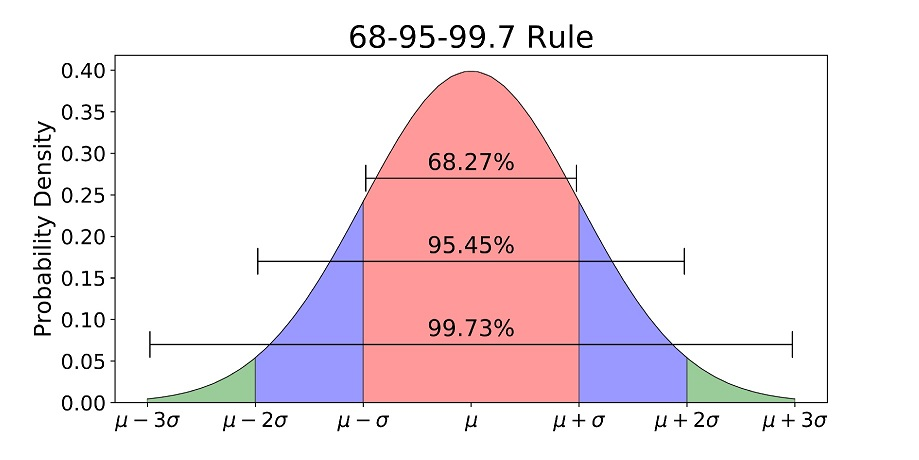

#### Anomaly
An anomaly is a pattern in data which does not conform to expected behavior
* Considered incorrect
* Example: negative time, distance, etc.

#### Outlier
An outlier is deviation(s!) away from the expected outcome
* Considered correct
* Example: certain values stand out and may be much higher or lower than expected
        - close to zero distance where the rest of the values are "miles" away
        - a very long distance, more than 3 standard deviatons away from the mean

For example when most temperature values range between 0 and 30 a value of 100 or -100 is most likely a value we consider an outlier

#### What is the difference between anomaly and outliers?
In some way there are no differences, we often want to exclude outliers/anomalies

#### Anomaly (or Outlier) detection:
The identification of rare items, (values, events or observations) which raise suspicion by being significantly different from the majority of the data.

The measure of being significantly different is often (at least) 3 * standard deviation in a normally distributed data.

#### Example
Create a series with random numbers
 - filter out very low and very high values
 - replace these values with set thresholds

In [35]:
# create a Series 2000 values
# every value is a float with mean = 0 and 1 standard deviation
ser = pd.Series(np.random.randn(5000))

Peak at the series:

In [36]:
ser.tail()

4995    0.189430
4996    0.740553
4997   -0.295467
4998   -0.347803
4999    0.706080
dtype: float64

Check basic stats:

In [37]:
ser.describe()

count    5000.000000
mean       -0.004391
std         0.998367
min        -4.108736
25%        -0.686861
50%        -0.000572
75%         0.662529
max         3.586360
dtype: float64

Filter for outliers (3 standard deviations away from mean):

In [38]:
ser[np.abs(ser) > 3]

20     -3.002368
227    -3.225099
647    -3.123127
1078    3.586360
1547   -3.088064
1764   -4.108736
2009    3.050511
3158    3.009117
3579    3.465792
3865    3.106657
4105   -3.060535
4531   -3.154848
4718   -3.112275
4760   -3.009627
dtype: float64

Note the few values and their indices

Now replace these values with +/-3 threshold values:

In [39]:
ser[np.abs(ser) > 3] = np.sign(ser) * 3
ser.describe()

count    5000.000000
mean       -0.004258
std         0.996308
min        -3.000000
25%        -0.686861
50%        -0.000572
75%         0.662529
max         3.000000
dtype: float64

Notice the min/max values are now +/-3

Double check few specific (previously) outlier values:

In [40]:
# note the indices will need to be modified if preceding notebook cells were reran 
print(ser[4449])
print(ser[4549])

0.39696893764975977
-0.9548539194090411


#### Homework 14.1:
- Create a dataframe with shape (100, 3)
- Populate with random integer values between 1 and 4
- Populate 10 NaN values randomly
- Fill in all the NaN values with integer 1
- Replace all the 4s with 3 
- Remove duplicate rows
- How many rows are in the final dataframe
- Print the final dataframe
- Extra: simulate and estimate the average number of rows in the final dataframe 

In [ ]:
# Homework 14.1 code comes here:



#### Homework 14.2:

Create a dataframe with random numbers
 - 3 features
 - values with normal distribution with a set mean and a set standard deviation
 - filter out outliers (using +/-3 standard deviation in each column
 - replace these values with the same calculated +/-3 standard deviation thresholds in each column

In [ ]:
# Homework 14.2 code comes here:



#### Homework 14.3:

Create a grader which converts exam scores to grades
- Create a dataframe with 1000 observations and 2 features
    + student IDs
    + scores on a midterm exam
    + scores should reflect normal distribution with mean of 70% and standard deviation of 10%
    + values with normal distribution with a set mean and a set standard deviation
    + verify if scores are all valid
    + add a new feature called 'grade'
    + display histogram of scores
    + display histogram of grades

In [ ]:
# Homework 14.3 code comes here:

